In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
vendas = pd.read_excel('base2/base_vendas2.xlsx')

In [3]:
grupos = pd.read_excel('base2/verifica_base.xlsx')

In [4]:
vendas = pd.merge(
    vendas,
    grupos,
    how='left',
    left_on='product_category_name',right_on='categoria'
)

In [5]:
vendas = vendas.drop(['product_category_name','categoria'],axis=1)

In [6]:
vendas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111923 entries, 0 to 111922
Data columns (total 22 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       111923 non-null  object        
 1   customer_id                    111923 non-null  object        
 2   order_status                   111923 non-null  object        
 3   order_purchase_timestamp       111923 non-null  datetime64[ns]
 4   order_approved_at              111808 non-null  datetime64[ns]
 5   order_delivered_carrier_date   110050 non-null  datetime64[ns]
 6   order_delivered_customer_date  108804 non-null  datetime64[ns]
 7   order_estimated_delivery_date  111923 non-null  datetime64[ns]
 8   order_item_id                  111206 non-null  float64       
 9   product_id                     111206 non-null  object        
 10  seller_id                      111206 non-null  object        
 11  

In [7]:
vendas.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,price,freight_value,customer_unique_id,customer_city,customer_state,dia_compra,mes_compra,ano_compra,ano_mes,grupo
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-02,2017-10-04,2017-10-10,2017-10-18,1.0,87285b34884572647811a353c7ac498a,...,29.99,8.72,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,2,10,2017,2017-10,casa
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24,2018-07-26,2018-07-26,2018-08-07,2018-08-13,1.0,595fac2a385ac33a80bd5114aec74eb8,...,118.70,22.76,af07308b275d755c9edb36a90c618231,barreiras,BA,24,7,2018,2018-07,beleza
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08,2018-08-08,2018-08-08,2018-08-17,2018-09-04,1.0,aa4383b373c6aca5d8797843e5594415,...,159.90,19.22,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO,8,8,2018,2018-08,carro


In [8]:
vendas.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 115
order_delivered_carrier_date     1873
order_delivered_customer_date    3119
order_estimated_delivery_date       0
order_item_id                     717
product_id                        717
seller_id                         717
shipping_limit_date               717
price                             717
freight_value                     717
customer_unique_id                  0
customer_city                       0
customer_state                      0
dia_compra                          0
mes_compra                          0
ano_compra                          0
ano_mes                             0
grupo                            2315
dtype: int64

In [9]:
vendas = vendas[vendas.price.notnull()]

In [10]:
vendas = vendas[vendas.order_status != 'canceled']

In [11]:
import datetime as dt

In [12]:
vendas = vendas[vendas.order_purchase_timestamp != dt.datetime(2017,11,24)]

In [13]:
vendas = vendas[vendas.order_purchase_timestamp != dt.datetime(2017,11,25)]

In [14]:
vendas.loc[vendas.grupo.isnull(),'grupo']='outros'

In [15]:
vendas.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  15
order_delivered_carrier_date      688
order_delivered_customer_date    1845
order_estimated_delivery_date       0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
customer_unique_id                  0
customer_city                       0
customer_state                      0
dia_compra                          0
mes_compra                          0
ano_compra                          0
ano_mes                             0
grupo                               0
dtype: int64

In [16]:
vendas.loc[vendas.order_approved_at.isnull(), 'order_status']

5909     delivered
18599    delivered
21347    delivered
25425    delivered
25982    delivered
30111    delivered
43022    delivered
44195    delivered
54379    delivered
69318    delivered
70806    delivered
76112    delivered
76113    delivered
81428    delivered
95536    delivered
Name: order_status, dtype: object

In [17]:
vendas.loc[vendas.order_approved_at.isnull()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,price,freight_value,customer_unique_id,customer_city,customer_state,dia_compra,mes_compra,ano_compra,ano_mes,grupo
5909,e04abd8149ef81b95221e88f6ed9ab6a,2127dc6603ac33544953ef05ec155771,delivered,2017-02-18,NaT,2017-02-23,2017-03-01,2017-03-17,1.0,0e20a07ca1714df21f9b07ca3bf7c682,...,309.90,39.11,8a9a08c7ca8900a200d83cf838a07e0b,cotia,SP,18,2,2017,2017-02,eletro_eletronicos
18599,8a9adc69528e1001fc68dd0aaebbb54a,4c1ccc74e00993733742a3c786dc3c1f,delivered,2017-02-18,NaT,2017-02-23,2017-03-02,2017-03-21,1.0,2c2b6a28924791234bd386bddb17512e,...,379.00,17.86,91efb7fcabc17925099dced52435837f,novo hamburgo,RS,18,2,2017,2017-02,construção
21347,7013bcfc1c97fe719a7b5e05e61c12db,2941af76d38100e0f8740a374f1a5dc3,delivered,2017-02-18,NaT,2017-02-22,2017-03-01,2017-03-17,1.0,583916a5dae918f5e89baec139141c54,...,49.99,15.53,e1f01a1bd6485e58ad3c769a5427d8a8,sao paulo,SP,18,2,2017,2017-02,outros
25425,5cf925b116421afa85ee25e99b4c34fb,29c35fc91fc13fb5073c8f30505d860d,delivered,2017-02-18,NaT,2017-02-22,2017-03-09,2017-03-31,1.0,c6dd917a0be2a704582055949915ab32,...,79.99,26.82,7e1a5ca61b572d76b64b6688b9f96473,caninde,CE,18,2,2017,2017-02,outros
25982,12a95a3c06dbaec84bcfb0e2da5d228a,1e101e0daffaddce8159d25a8e53f2b2,delivered,2017-02-17,NaT,2017-02-22,2017-03-02,2017-03-20,1.0,c6dd917a0be2a704582055949915ab32,...,79.99,15.77,c8822fce1d0bfa7ddf0da24fff947172,macae,RJ,17,2,2017,2017-02,outros
30111,c1d4211b3dae76144deccd6c74144a88,684cb238dc5b5d6366244e0e0776b450,delivered,2017-01-19,NaT,2017-01-25,2017-01-30,2017-03-01,1.0,5ab02ca028398131a5ae91401eb49788,...,39.99,14.52,6ff8b0d7b35d5c945633b8d60165691b,santos,SP,19,1,2017,2017-01,esporte
43022,d69e5d356402adc8cf17e08b5033acfb,68d081753ad4fe22fc4d410a9eb1ca01,delivered,2017-02-19,NaT,2017-02-23,2017-03-02,2017-03-27,1.0,cae2e38942c8489d9d7a87a3f525c06b,...,149.80,13.63,2e0a2166aa23da2472c6a60c4af6f7a6,sao paulo,SP,19,2,2017,2017-02,casa
44195,d77031d6a3c8a52f019764e68f211c69,0bf35cac6cc7327065da879e2d90fae8,delivered,2017-02-18,NaT,2017-02-23,2017-03-02,2017-03-22,1.0,02a79d79e818ad0be36cfc843a6af7ad,...,28.99,10.96,c4c0011e639bdbcf26059ddc38bd3c18,varzea paulista,SP,18,2,2017,2017-02,esporte
54379,7002a78c79c519ac54022d4f8a65e6e8,d5de688c321096d15508faae67a27051,delivered,2017-01-19,NaT,2017-01-27,2017-02-06,2017-03-16,1.0,c3b271f47e73d0c9ccf1b43b7606c705,...,45.90,14.52,d49f3dae6bad25d05160fc17aca5942d,conselheiro lafaiete,MG,19,1,2017,2017-01,casa
69318,2eecb0d85f281280f79fa00f9cec1a95,a3d3c38e58b9d2dfb9207cab690b6310,delivered,2017-02-17,NaT,2017-02-22,2017-03-03,2017-03-20,1.0,4fd676d9c4723d475026e40aeae56957,...,135.00,19.23,5a4fa4919cbf2b049e72be460a380e5b,abaete,MG,17,2,2017,2017-02,construção


In [18]:
vendas=vendas.drop('order_approved_at', axis=1)

<AxesSubplot:>

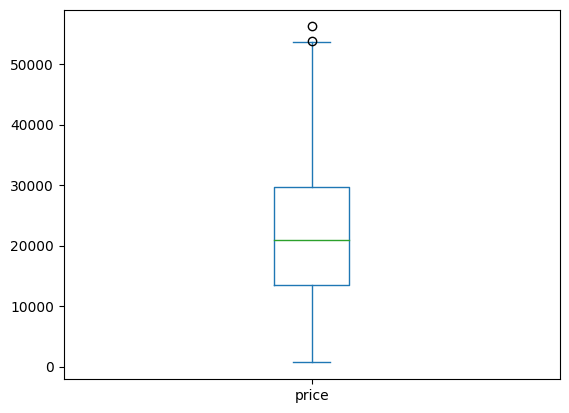

In [19]:
vendas.groupby('order_purchase_timestamp')['price'].sum().plot.box()

In [20]:
vendas.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,...,price,freight_value,customer_unique_id,customer_city,customer_state,dia_compra,mes_compra,ano_compra,ano_mes,grupo
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-04,2017-10-10,2017-10-18,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,...,29.99,8.72,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,2,10,2017,2017-10,casa
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24,2018-07-26,2018-08-07,2018-08-13,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,...,118.70,22.76,af07308b275d755c9edb36a90c618231,barreiras,BA,24,7,2018,2018-07,beleza
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08,2018-08-08,2018-08-17,2018-09-04,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,...,159.90,19.22,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO,8,8,2018,2018-08,carro


<AxesSubplot:xlabel='order_purchase_timestamp'>

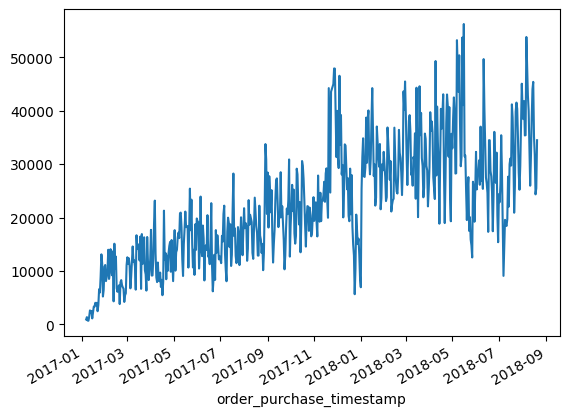

In [21]:
vendas.groupby('order_purchase_timestamp')['price'].sum().plot()

<AxesSubplot:xlabel='order_purchase_timestamp'>

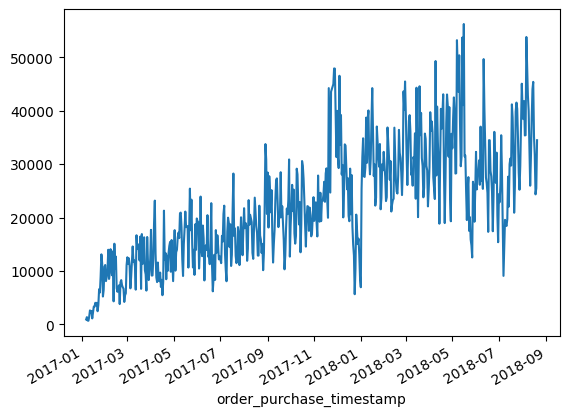

In [22]:
vendas.groupby('order_purchase_timestamp')['price'].sum().plot()

In [31]:
import matplotlib.pyplot as plt

In [25]:
venda_vlr = vendas.groupby('order_purchase_timestamp')['price'].sum()

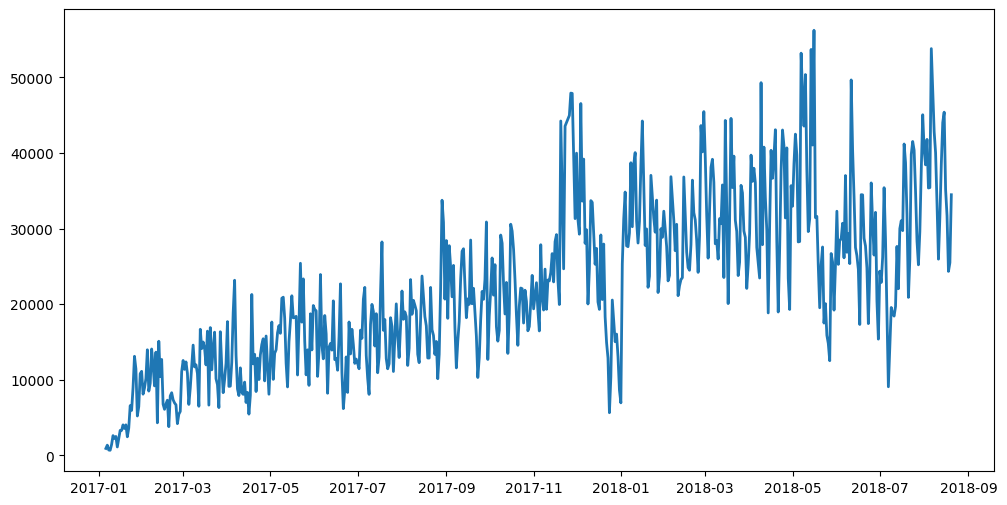

In [33]:
fig, ax = plt.subplots(figsize=(12, 6))

x = venda_vlr.index
y = venda_vlr.values

ax.plot(x, y, linewidth=2.0)

plt.show()

In [34]:
venda_vlr.index[-1]

Timestamp('2018-08-20 00:00:00')

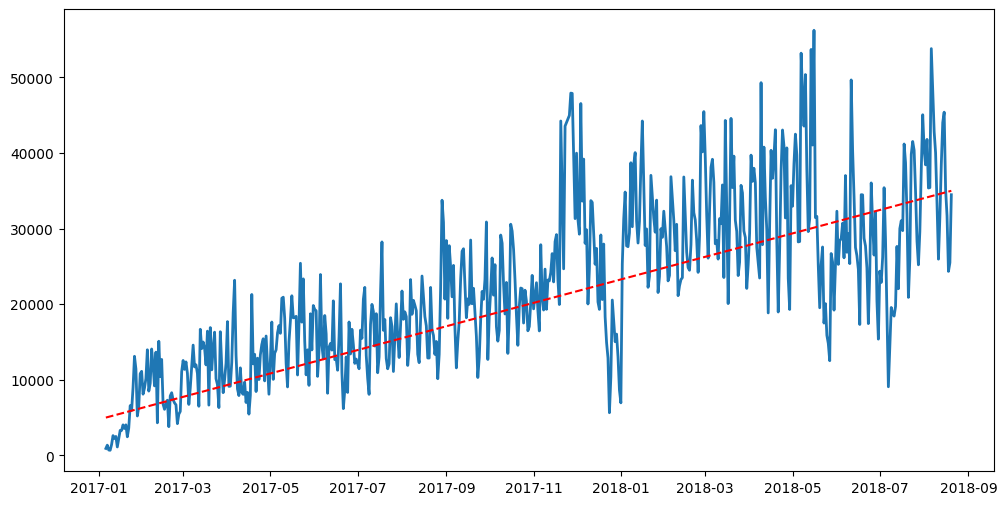

In [35]:
fig, ax = plt.subplots(figsize=(12,6))

x = venda_vlr.index
y= venda_vlr.values

ax.plot(x, y, linewidth=2.0)

x_reta=[venda_vlr.index[0],venda_vlr.index[-1]]
y_reta=[5000,35000]

ax.plot(x_reta, y_reta, '--r')

plt.show()

In [37]:
venda_vlr=venda_vlr.reset_index()
venda_vlr

,order_purchase_timestamp,price
0,2017-01-06,916.38
1,2017-01-07,1351.90
2,2017-01-08,709.58
3,2017-01-09,673.79
4,2017-01-10,1434.87
...,...,...
585,2018-08-16,35166.77
586,2018-08-17,31683.18
587,2018-08-18,24340.95
588,2018-08-19,25487.39


In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
import datetime as dt

In [42]:
X = venda_vlr[['order_purchase_timestamp']]
y = venda_vlr.price

reg = LinearRegression().fit(X, y)
reg.score(X, y)

TypeError: float() argument must be a string or a real number, not 'DataFrame'

In [43]:
venda_vlr.tail(3)

,order_purchase_timestamp,price
587,2018-08-18,24340.95
588,2018-08-19,25487.39
589,2018-08-20,34479.50


In [44]:
venda_vlr['ajuste_data']=(venda_vlr.order_purchase_timestamp-venda_vlr.order_purchase_timestamp.min()).dt.days
venda_vlr.tail()

,order_purchase_timestamp,price,ajuste_data
585,2018-08-16,35166.77,587
586,2018-08-17,31683.18,588
587,2018-08-18,24340.95,589
588,2018-08-19,25487.39,590
589,2018-08-20,34479.50,591


In [45]:
X = venda_vlr[['ajuste_data']]
y=venda_vlr.price

In [46]:
reg = LinearRegression().fit(X, y)

In [47]:
reg.score(X, y)

0.5709008152888746

In [48]:
reg.coef_

array([48.53592273])

In [49]:
reg.intercept_

7921.5394934581345

In [50]:
venda_vlr.head(3)

,order_purchase_timestamp,price,ajuste_data
0,2017-01-06,916.38,0
1,2017-01-07,1351.90,1
2,2017-01-08,709.58,2


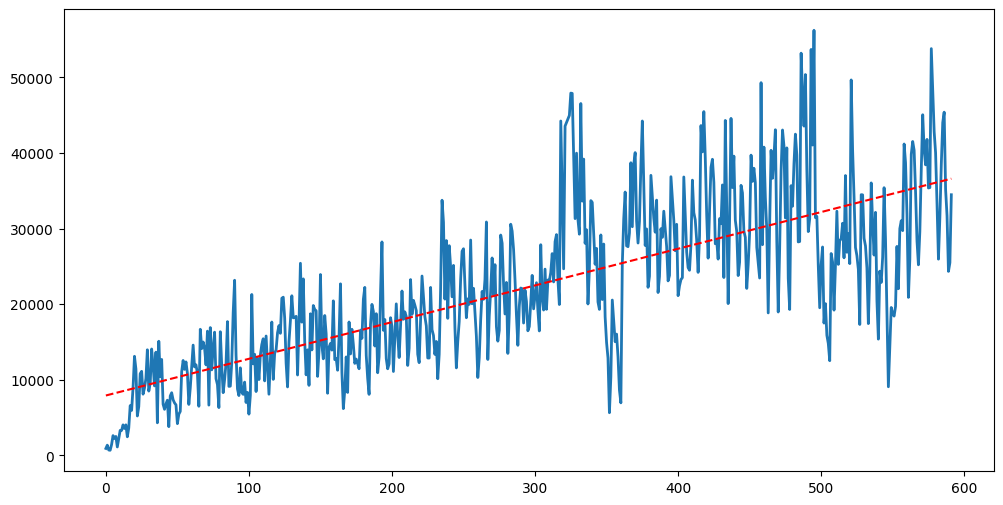

In [52]:
fig, ax = plt.subplots(figsize=(12,6))

x = venda_vlr.ajuste_data
y = venda_vlr.price

ax.plot(x, y, linewidth=2.0)

x_reta = venda_vlr.ajuste_data
y_reta = x_reta*reg.coef_[0]+reg.intercept_

ax.plot(x_reta, y_reta, '--r')

plt.show()

In [54]:
venda_grupo=vendas.groupby(['order_purchase_timestamp','grupo'])['price'].sum().reset_index()

<AxesSubplot:>

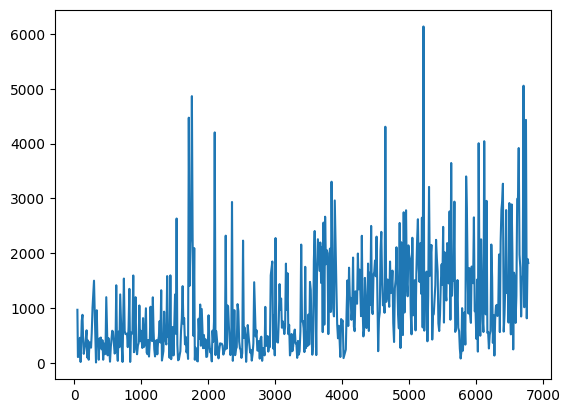

In [56]:
venda_grupo.loc[venda_grupo.grupo=='carro','price'].plot()

In [57]:
venda_grupo=vendas.groupby(['order_purchase_timestamp','grupo'])['price'].sum().reset_index()

In [58]:
venda_grupo.order_purchase_timestamp.max()

Timestamp('2018-08-20 00:00:00')

In [59]:
treino = venda_grupo[venda_grupo.order_purchase_timestamp <= dt.datetime(2018,3,1)]
teste = venda_grupo[venda_grupo.order_purchase_timestamp > dt.datetime(2018,3,1)]

print(treino.shape)

print(teste.shape)

print(teste.shape[0]/venda_grupo.shape[0])

(4764, 3)
(2028, 3)
0.29858657243816256


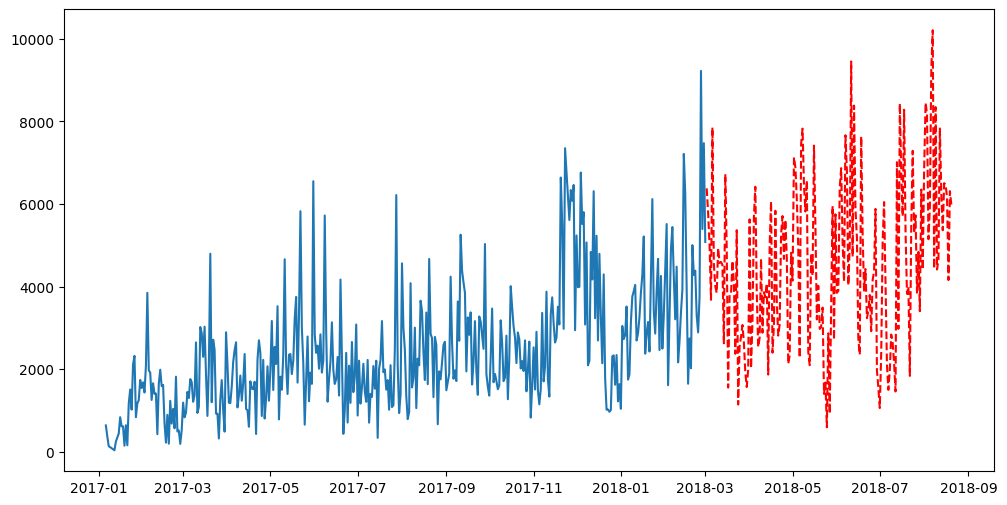

In [60]:
fig, ax = plt.subplots(figsize=(12,6))

filtro='beleza'

base_treino = treino[treino.grupo == filtro]
base_teste= teste[teste.grupo == filtro]

ax.plot(base_treino.order_purchase_timestamp, base_treino.price)
ax.plot(base_teste.order_purchase_timestamp, base_teste.price, '--r')

plt.show()

In [71]:
X_treino=treino[['order_purchase_timestamp','grupo']]

In [72]:
y_treino=treino.price

In [73]:
reg = LinearRegression().fit(X_treino, y_treino)

TypeError: float() argument must be a string or a real number, not 'Timestamp'

In [74]:
venda_grupo['ajuste_data']=(venda_grupo.order_purchase_timestamp - venda_grupo.order_purchase_timestamp.min()).dt.days
treino = venda_grupo[venda_grupo.order_purchase_timestamp<=dt.datetime(2018,3,1)]
teste=venda_grupo[venda_grupo.order_purchase_timestamp>dt.datetime(2018,3,1)]

In [75]:
X_treino=treino[['ajuste_data','grupo']]
y_treino = treino.price

In [76]:
reg=LinearRegression().fit(X_treino, y_treino)

ValueError: could not convert string to float: 'beleza'

In [77]:
treino = pd.concat([treino,pd.get_dummies(treino.grupo)], axis=1)
treino.head()

,order_purchase_timestamp,grupo,price,ajuste_data,beleza,carro,casa,construção,crianças,eletro_eletronicos,esporte,games,outros,presentes,produtos_diversos,telefonia_audio_video
0,2017-01-06,beleza,636.00,0,1,0,0,0,0,0,0,0,0,0,0,0
1,2017-01-06,crianças,159.99,0,0,0,0,0,1,0,0,0,0,0,0,0
2,2017-01-06,games,109.90,0,0,0,0,0,0,0,0,1,0,0,0,0
3,2017-01-06,telefonia_audio_video,10.49,0,0,0,0,0,0,0,0,0,0,0,0,1
4,2017-01-07,beleza,370.00,1,1,0,0,0,0,0,0,0,0,0,0,0


In [78]:
X_treino=treino.drop(['order_purchase_timestamp', 'grupo','price'],axis=1)

In [79]:
y_treino=treino.price

In [80]:
reg = LinearRegression().fit(X_treino, y_treino)

In [81]:
reg.score(X_treino, y_treino)

0.46812977291893065

In [82]:
reg.coef_

array([   4.97394105,  858.08651134, -807.69246935, 2416.91704131,
       -546.3142765 , -260.66071268,  513.81842148, -111.10766099,
       -779.32810301,  434.41500384,  -56.28567456, -971.96404565,
       -689.88403523])

In [83]:
treino['previsao']=reg.predict(X_treino)

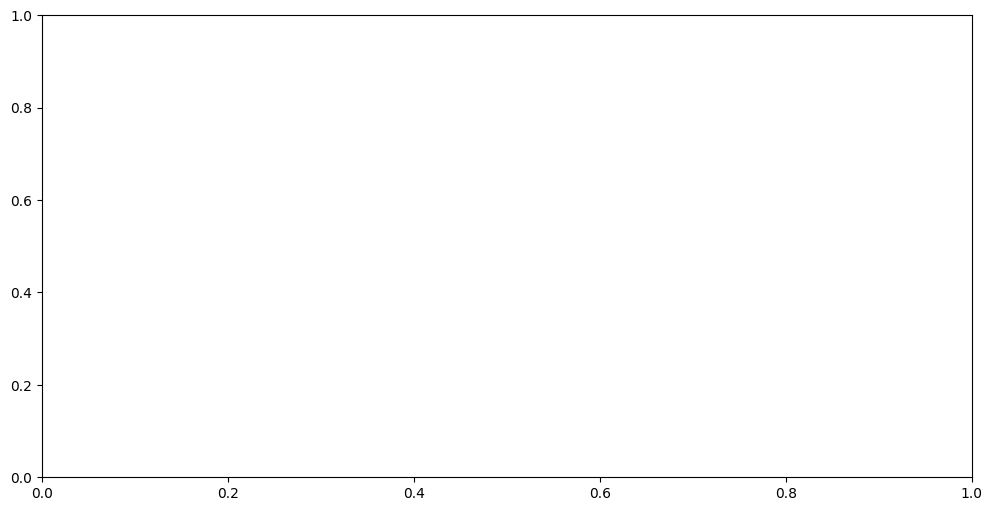

In [68]:
fig, ax =plt.subplots(figsize=(12,6))

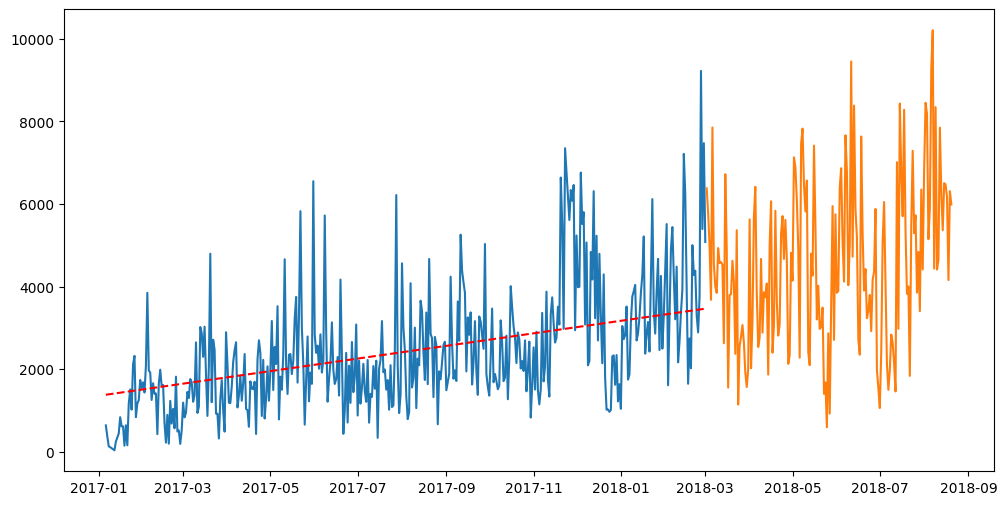

In [84]:
fig, ax =plt.subplots(figsize=(12,6))
filtro = 'beleza'

base_treino=treino[treino.grupo == filtro]
base_teste=teste[teste.grupo==filtro]

ax.plot(base_treino.order_purchase_timestamp, base_treino.price)
ax.plot(base_teste.order_purchase_timestamp, base_teste.price)
ax.plot(base_treino.order_purchase_timestamp, base_treino.previsao,'--r')

plt.show()

In [85]:
teste=pd.concat([teste, pd.get_dummies(teste.grupo)],axis=1)

In [86]:
X_teste=teste.drop(['order_purchase_timestamp','grupo','price'],axis=1)
y_teste=teste.price

In [87]:
teste['previsao']=reg.predict(X_teste)

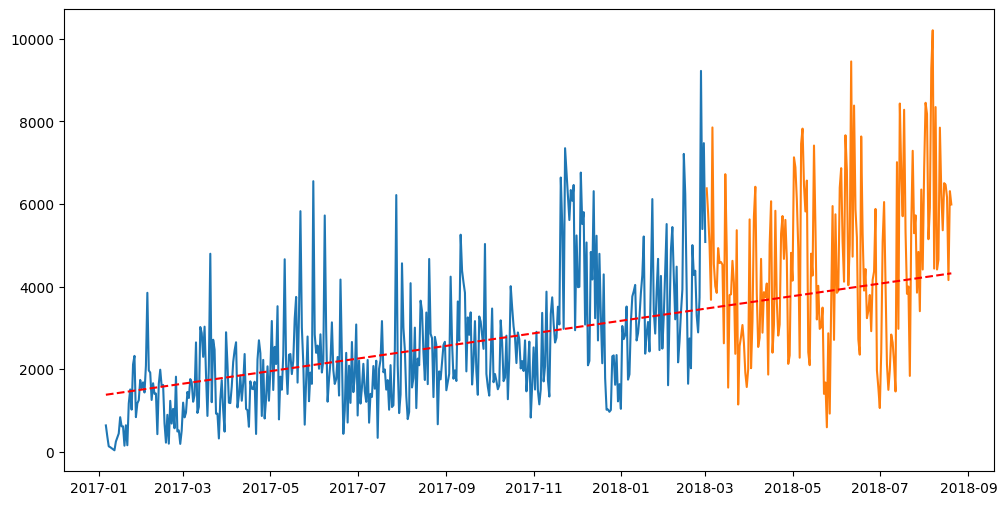

In [89]:
fig, ax = plt.subplots(figsize=(12,6))

filtro = 'beleza'

base_treino = treino[treino.grupo == filtro]
base_teste = teste[teste.grupo == filtro]

ax.plot(base_treino.order_purchase_timestamp, base_treino.price)
ax.plot(base_teste.order_purchase_timestamp, base_teste.price)
ax.plot(base_treino.order_purchase_timestamp,base_treino.previsao,'--r')
ax.plot(base_teste.order_purchase_timestamp,base_teste.previsao,'--r')

plt.show()

In [90]:
vendas.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,...,price,freight_value,customer_unique_id,customer_city,customer_state,dia_compra,mes_compra,ano_compra,ano_mes,grupo
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-04,2017-10-10,2017-10-18,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,...,29.99,8.72,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,2,10,2017,2017-10,casa
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24,2018-07-26,2018-08-07,2018-08-13,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,...,118.70,22.76,af07308b275d755c9edb36a90c618231,barreiras,BA,24,7,2018,2018-07,beleza
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08,2018-08-08,2018-08-17,2018-09-04,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,...,159.90,19.22,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO,8,8,2018,2018-08,carro


In [92]:
venda_grupo=vendas.groupby(['order_purchase_timestamp','mes_compra','ano_compra','grupo'])['price'].sum().reset_index()

In [93]:
treino = venda_grupo[venda_grupo.order_purchase_timestamp <= dt.datetime(2018,3,1)]
teste = venda_grupo[venda_grupo.order_purchase_timestamp > dt.datetime(2018,3,1)]

O proximo bloco serve como base 

In [97]:
# Separando X e y para treino 
treino = pd.concat([treino,pd.get_dummies(treino.grupo)], axis=1)
X_treino=treino.drop(['order_purchase_timestamp','grupo','price'],axis=1)
y_treino=treino.price

# Fazendo fit do modelo 
reg= LinearRegression().fit(X_treino, y_treino)

#Fazendo previsão para a base treino
treino['previsao'] = reg.predict(X_treino)

#Fazendo a previsão para a base de teste
teste = pd.concat([teste,pd.get_dummies(teste.grupo)], axis=1)
X_teste=teste.drop(['order_purchase_timestamp','grupo','price'],axis=1)
teste['previsao'] = reg.predict(X_teste)

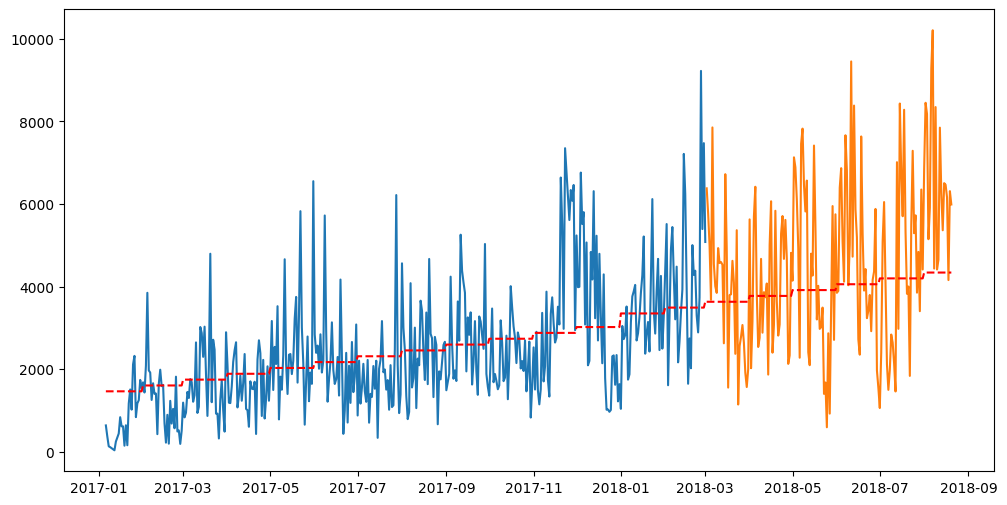

In [99]:
fig, ax = plt.subplots(figsize=(12,6))

filtro = 'beleza'

base_treino = treino[treino.grupo == filtro]
base_teste = teste[teste.grupo == filtro]

ax.plot(base_treino.order_purchase_timestamp, base_treino.price)
ax.plot(base_teste.order_purchase_timestamp, base_teste.price)
ax.plot(base_treino.order_purchase_timestamp,base_treino.previsao,'--r')
ax.plot(base_teste.order_purchase_timestamp,base_teste.previsao,'--r')

plt.show()

Encerra

In [100]:
X_treino = treino.drop(['order_purchase_timestamp','grupo','price','previsao'],axis=1)
y_treino = treino.price

In [101]:
from sklearn.tree import DecisionTreeRegressor

In [102]:
regressor = DecisionTreeRegressor(random_state=0)

In [103]:
regressor.fit(X_treino, y_treino)

DecisionTreeRegressor(random_state=0)

In [104]:
regressor.score(X_treino,y_treino)

0.5728847066032111

In [105]:
treino['prev_arvore']=regressor.predict(X_treino)


In [106]:
X_teste = teste.drop(['order_purchase_timestamp','grupo','price','previsao'],axis=1)
teste['prev_arvore']=regressor.predict(X_teste)

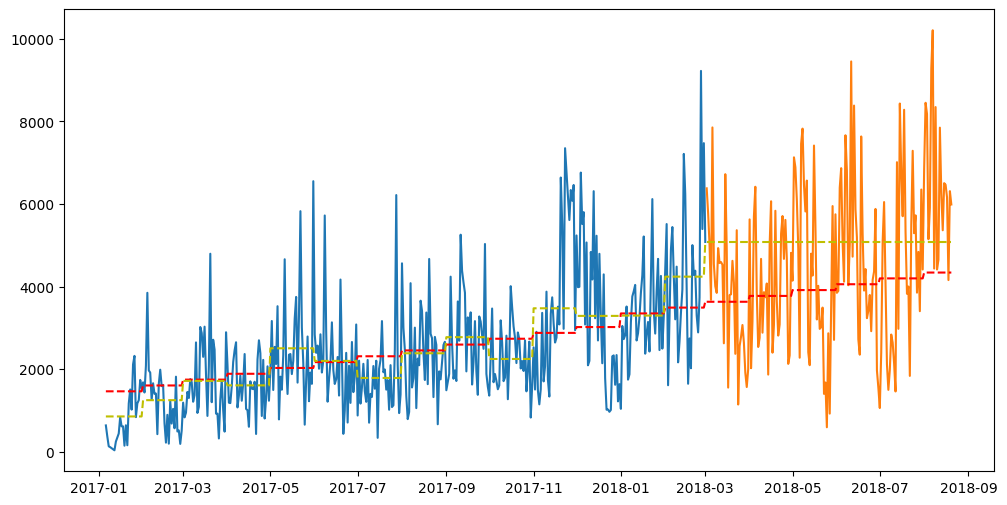

In [108]:
fig, ax = plt.subplots(figsize=(12,6))

filtro = 'beleza'

base_treino = treino[treino.grupo == filtro]
base_teste = teste[teste.grupo == filtro]

ax.plot(base_treino.order_purchase_timestamp, base_treino.price)
ax.plot(base_teste.order_purchase_timestamp, base_teste.price)
ax.plot(base_treino.order_purchase_timestamp,base_treino.previsao,'--r')
ax.plot(base_teste.order_purchase_timestamp,base_teste.previsao,'--r')
ax.plot(base_treino.order_purchase_timestamp,base_treino.prev_arvore,'--y')
ax.plot(base_teste.order_purchase_timestamp,base_teste.prev_arvore,'--y')

plt.show()

In [109]:
from sklearn.metrics import mean_absolute_error

In [110]:
y_true=teste.price
y_pred=teste.previsao
mean_absolute_error(y_true, y_pred)

1426.539247391812

In [111]:
y_true=teste.price
y_pred=teste.prev_arvore
mean_absolute_error(y_true, y_pred)

1515.8149457593688